<a href="https://colab.research.google.com/github/abhishekkh1701/CS253_ML_Assignment/blob/main/CS253_ML_Assignment_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education
0,0,M.K. Mohan,ANNA NAGAR,DMK,4,211 Crore+,2 Crore+,TAMIL NADU,8th Pass
1,1,Khatik Ramesh Prasad,KARERA (SC),BJP,0,1 Crore+,0,MADHYA PRADESH,12th Pass
2,2,Dr. Mantar Gowda,MADIKERI,INC,0,7 Crore+,22 Lac+,KARNATAKA,Post Graduate
3,3,Kundan Kumar,BEGUSARAI,BJP,0,9 Crore+,24 Lac+,BIHAR,Post Graduate
4,4,Swapan Majumder,BANGAON DAKSHIN (SC),BJP,2,2 Crore+,61 Lac+,WEST BENGAL,8th Pass


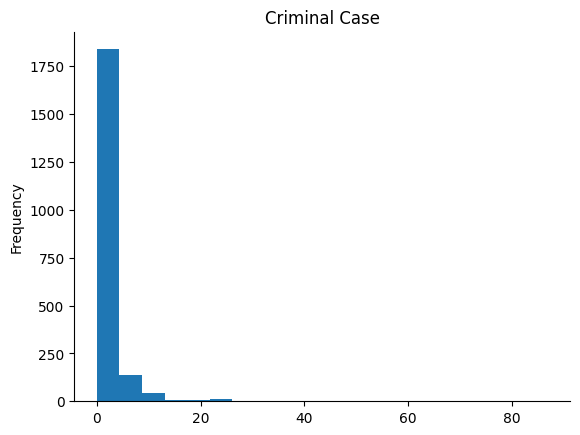

In [4]:
# @title Criminal Case

from matplotlib import pyplot as plt
df['Criminal Case'].plot(kind='hist', bins=20, title='Criminal Case')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
df.describe()

,ID,Criminal Case
count,2059.000000,2059.000000
mean,1029.000000,1.777562
std,594.526422,4.762183
min,0.000000,0.000000
25%,514.500000,0.000000
50%,1029.000000,0.000000
75%,1543.500000,2.000000
max,2058.000000,87.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              2059 non-null   int64 
 1   Candidate       2059 non-null   object
 2   Constituency ∇  2059 non-null   object
 3   Party           2059 non-null   object
 4   Criminal Case   2059 non-null   int64 
 5   Total Assets    2059 non-null   object
 6   Liabilities     2059 non-null   object
 7   state           2059 non-null   object
 8   Education       2059 non-null   object
dtypes: int64(2), object(7)
memory usage: 144.9+ KB


In [7]:
def encode_candidate(candidate_name):
    if candidate_name.startswith('Adv.'):
        return 1
    elif candidate_name.startswith('Dr.'):
        return 2
    else:
        return 0

# Applying the encoding to the 'Candidate' column
df['Candidate_Encoded'] = df['Candidate'].apply(encode_candidate)
df.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education,Candidate_Encoded
0,0,M.K. Mohan,ANNA NAGAR,DMK,4,211 Crore+,2 Crore+,TAMIL NADU,8th Pass,0
1,1,Khatik Ramesh Prasad,KARERA (SC),BJP,0,1 Crore+,0,MADHYA PRADESH,12th Pass,0
2,2,Dr. Mantar Gowda,MADIKERI,INC,0,7 Crore+,22 Lac+,KARNATAKA,Post Graduate,2
3,3,Kundan Kumar,BEGUSARAI,BJP,0,9 Crore+,24 Lac+,BIHAR,Post Graduate,0
4,4,Swapan Majumder,BANGAON DAKSHIN (SC),BJP,2,2 Crore+,61 Lac+,WEST BENGAL,8th Pass,0


In [8]:
def convert_to_numeric(s):
    # Converting string representation to numeric value
    if 'crore+' in s.lower():
        value = float(s.lower().replace(' crore+', '')) * 10**7
    elif 'lac+' in s.lower():
        value = float(s.lower().replace(' lac+', '')) * 10**5
    elif 'thou+' in s.lower():
        value = float(s.lower().replace(' thou+', '')) * 10**3
    elif 'hund+' in s.lower():
        value = float(s.lower().replace(' hund+', '')) * 10**2
    else:
        value = float(s)  # If no suffix, assuming it's already a numeric value
    return int(value)  # Converting to integer

# Applying the function to 'Total Assets' and 'Liabilities' columns
df['Total Assets'] = df['Total Assets'].apply(convert_to_numeric)
df['Liabilities'] = df['Liabilities'].apply(convert_to_numeric)

In [9]:
df['Constituency_Class'] = ''

#Extracting class information from the "Constituency" column
df.loc[df.iloc[:, 2].str.contains('\(SC\)'), 'Constituency_Class'] = 'SC'
df.loc[df.iloc[:, 2].str.contains('\(ST\)'), 'Constituency_Class'] = 'ST'

# Replacing class information in the "Constituency" column with an empty string
df.iloc[:, 2] = df.iloc[:, 2].str.replace(r'\(.*\)', '').str.strip()

# Encoding class information using label encoding
label_encoder = LabelEncoder()
df['Constituency_Class_Encoded'] = label_encoder.fit_transform(df['Constituency_Class'])
df.drop('Constituency_Class', axis=1, inplace=True)


df.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education,Candidate_Encoded,Constituency_Class_Encoded
0,0,M.K. Mohan,ANNA NAGAR,DMK,4,2110000000,20000000,TAMIL NADU,8th Pass,0,0
1,1,Khatik Ramesh Prasad,KARERA (SC),BJP,0,10000000,0,MADHYA PRADESH,12th Pass,0,1
2,2,Dr. Mantar Gowda,MADIKERI,INC,0,70000000,2200000,KARNATAKA,Post Graduate,2,0
3,3,Kundan Kumar,BEGUSARAI,BJP,0,90000000,2400000,BIHAR,Post Graduate,0,0
4,4,Swapan Majumder,BANGAON DAKSHIN (SC),BJP,2,20000000,6100000,WEST BENGAL,8th Pass,0,1


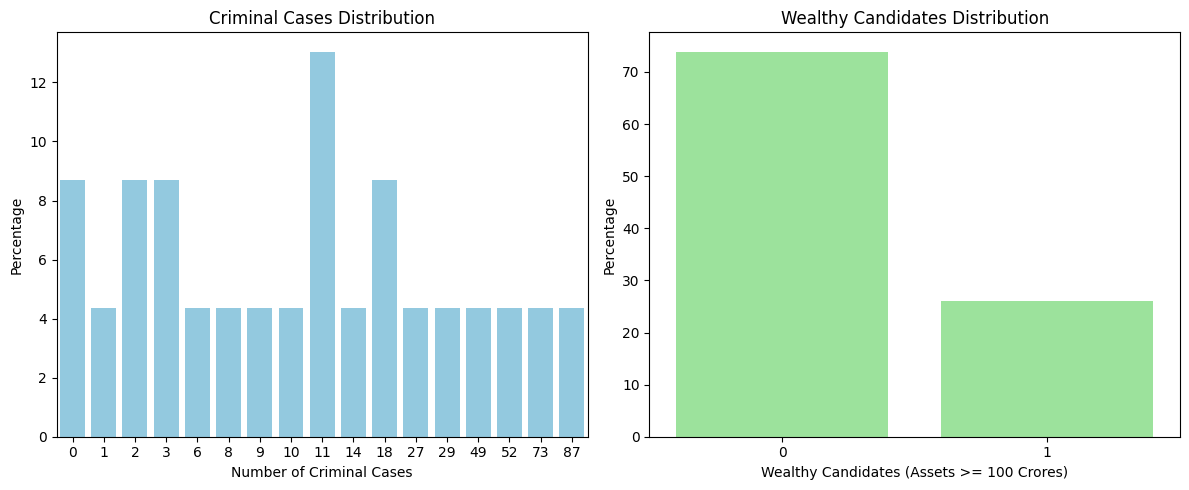

In [10]:
criminal_cases_distribution = df.groupby('Party')['Criminal Case'].max().value_counts(normalize=True) * 100

# Analysis: Wealthy Candidates by Party
wealthy_candidates_distribution = df.groupby('Party')['Total Assets'].max().reset_index()
wealthy_candidates_distribution['Total Assets'] = wealthy_candidates_distribution['Total Assets'].apply(lambda x: 1 if x >= 1000000000 else 0)
wealthy_candidates_distribution = wealthy_candidates_distribution['Total Assets'].value_counts(normalize=True) * 100

# Visualization
plt.figure(figsize=(12, 5))

# Plotting Criminal Cases Distribution
plt.subplot(1, 2, 1)
sns.barplot(x=criminal_cases_distribution.index, y=criminal_cases_distribution.values, color='skyblue')
plt.title('Criminal Cases Distribution')
plt.xlabel('Number of Criminal Cases')
plt.ylabel('Percentage')

# Plotting Wealthy Candidates Distribution
plt.subplot(1, 2, 2)
sns.barplot(x=wealthy_candidates_distribution.index, y=wealthy_candidates_distribution.values, color='lightgreen')
plt.title('Wealthy Candidates Distribution')
plt.xlabel('Wealthy Candidates (Assets >= 100 Crores)')
plt.ylabel('Percentage')

plt.tight_layout()
plt.show()

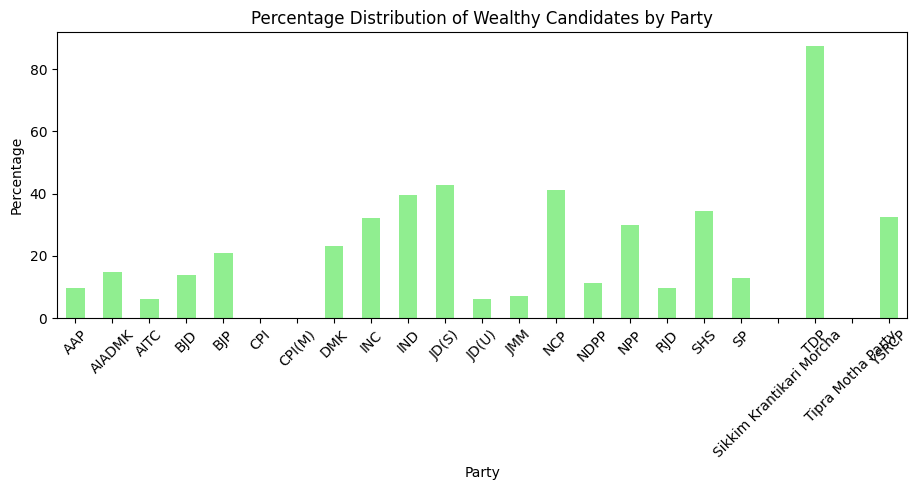

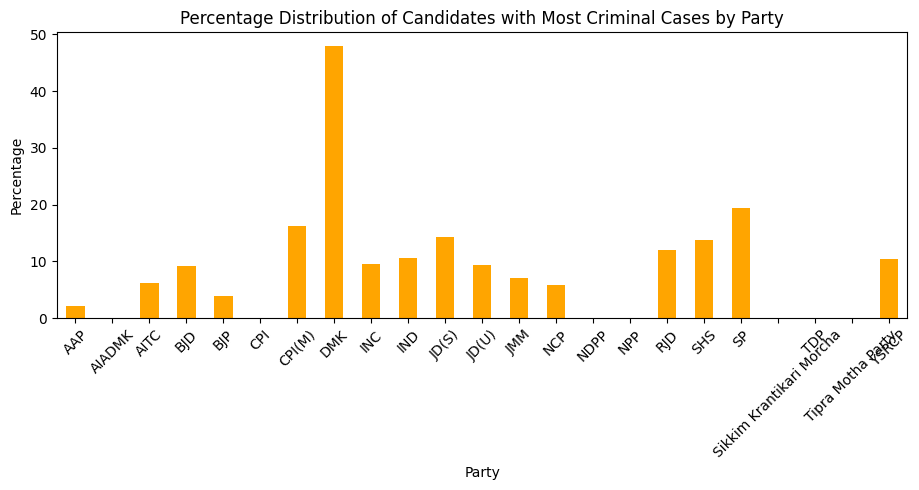

In [11]:
# Analysis: Candidates with Most Criminal Cases
most_criminal_candidates_distribution = df.groupby('Party')['Criminal Case'].apply(lambda x: (x > 5).sum() / len(x) * 100)

# Analysis: Wealthy Candidates by Party
wealthy_candidates_distribution = df.groupby('Party')['Total Assets'].apply(lambda x: (x >= 100000000).sum() / len(x) * 100)

# Visualization
plt.figure(figsize=(18, 5))

# Plotting Wealthy Candidates Distribution by Party
plt.subplot(1, 2, 1)
wealthy_candidates_distribution.plot(kind='bar', color='lightgreen')
plt.title('Percentage Distribution of Wealthy Candidates by Party')
plt.xlabel('Party')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Visualization
plt.figure(figsize=(18, 5))

# Plotting Party wise Percentage Distribution of Candidates with Most Criminal Cases
plt.subplot(1, 2, 2)
most_criminal_candidates_distribution.plot(kind='bar', color='orange')
plt.title('Percentage Distribution of Candidates with Most Criminal Cases by Party')
plt.xlabel('Party')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [12]:
# one hot encoding
df = pd.get_dummies(df, columns=['Party'])
one_hot_columns = [col for col in df.columns if col.startswith('Party_')]
df[one_hot_columns] = df[one_hot_columns].astype(int)


df.head()

,ID,Candidate,Constituency ∇,Criminal Case,Total Assets,Liabilities,state,Education,Candidate_Encoded,Constituency_Class_Encoded,...,Party_NCP,Party_NDPP,Party_NPP,Party_RJD,Party_SHS,Party_SP,Party_Sikkim Krantikari Morcha,Party_TDP,Party_Tipra Motha Party,Party_YSRCP
0,0,M.K. Mohan,ANNA NAGAR,4,2110000000,20000000,TAMIL NADU,8th Pass,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Khatik Ramesh Prasad,KARERA (SC),0,10000000,0,MADHYA PRADESH,12th Pass,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,Dr. Mantar Gowda,MADIKERI,0,70000000,2200000,KARNATAKA,Post Graduate,2,0,...,0,0,0,0,0,0,0,0,0,0
3,3,Kundan Kumar,BEGUSARAI,0,90000000,2400000,BIHAR,Post Graduate,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,Swapan Majumder,BANGAON DAKSHIN (SC),2,20000000,6100000,WEST BENGAL,8th Pass,0,1,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df.drop(df.columns[2], axis=1, inplace=True)
df.head()

,ID,Candidate,Criminal Case,Total Assets,Liabilities,state,Education,Candidate_Encoded,Constituency_Class_Encoded,Party_AAP,...,Party_NCP,Party_NDPP,Party_NPP,Party_RJD,Party_SHS,Party_SP,Party_Sikkim Krantikari Morcha,Party_TDP,Party_Tipra Motha Party,Party_YSRCP
0,0,M.K. Mohan,4,2110000000,20000000,TAMIL NADU,8th Pass,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Khatik Ramesh Prasad,0,10000000,0,MADHYA PRADESH,12th Pass,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,Dr. Mantar Gowda,0,70000000,2200000,KARNATAKA,Post Graduate,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,Kundan Kumar,0,90000000,2400000,BIHAR,Post Graduate,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,Swapan Majumder,2,20000000,6100000,WEST BENGAL,8th Pass,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df = pd.get_dummies(df, columns=['state'])
one_hot_columns = [col for col in df.columns if col.startswith('state_')]
df[one_hot_columns] = df[one_hot_columns].astype(int)
df.head(100)

,ID,Candidate,Criminal Case,Total Assets,Liabilities,Education,Candidate_Encoded,Constituency_Class_Encoded,Party_AAP,Party_AIADMK,...,state_ODISHA,state_PUDUCHERRY,state_PUNJAB,state_RAJASTHAN,state_SIKKIM,state_TAMIL NADU,state_TRIPURA,state_UTTAR PRADESH,state_UTTARAKHAND,state_WEST BENGAL
0,0,M.K. Mohan,4,2110000000,20000000,8th Pass,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,Khatik Ramesh Prasad,0,10000000,0,12th Pass,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,Dr. Mantar Gowda,0,70000000,2200000,Post Graduate,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,Kundan Kumar,0,90000000,2400000,Post Graduate,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,Swapan Majumder,2,20000000,6100000,8th Pass,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,Pratima Bhoumik,0,7800000,0,Graduate,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
96,96,Ranjit Singh,0,270000000,1600000,Graduate,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,97,Padmini Dian,0,9400000,500000,12th Pass,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
98,98,Vaibhav Vijay Naik,1,200000000,8900000,Graduate,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
distinct_educations = df['Education'].unique()
print(distinct_educations)

['8th Pass' '12th Pass' 'Post Graduate' 'Graduate Professional' 'Graduate'
 '10th Pass' 'Others' 'Doctorate' 'Literate' '5th Pass']


In [16]:
education_mapping = {
    'Others': 0,
    '5th Pass': 2,
    'Literate': 1,
    'Doctorate': 9,
    '10th Pass': 4,
    'Graduate': 6,
    'Graduate Professional': 7,
    'Post Graduate': 8,
    '12th Pass': 5,
    '8th Pass': 3
}

# Label encoding the 'Education' column
df['Education'] = df['Education'].map(education_mapping)


In [17]:
df.head()

,ID,Candidate,Criminal Case,Total Assets,Liabilities,Education,Candidate_Encoded,Constituency_Class_Encoded,Party_AAP,Party_AIADMK,...,state_ODISHA,state_PUDUCHERRY,state_PUNJAB,state_RAJASTHAN,state_SIKKIM,state_TAMIL NADU,state_TRIPURA,state_UTTAR PRADESH,state_UTTARAKHAND,state_WEST BENGAL
0,0,M.K. Mohan,4,2110000000,20000000,3,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,Khatik Ramesh Prasad,0,10000000,0,5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,Dr. Mantar Gowda,0,70000000,2200000,8,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,Kundan Kumar,0,90000000,2400000,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,Swapan Majumder,2,20000000,6100000,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
# Dropping the 'ID' and 'Candidate' columns
df.drop(['ID', 'Candidate'], axis=1, inplace=True)

df.head()

,Criminal Case,Total Assets,Liabilities,Education,Candidate_Encoded,Constituency_Class_Encoded,Party_AAP,Party_AIADMK,Party_AITC,Party_BJD,...,state_ODISHA,state_PUDUCHERRY,state_PUNJAB,state_RAJASTHAN,state_SIKKIM,state_TAMIL NADU,state_TRIPURA,state_UTTAR PRADESH,state_UTTARAKHAND,state_WEST BENGAL
0,4,2110000000,20000000,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,10000000,0,5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,70000000,2200000,8,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,90000000,2400000,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,20000000,6100000,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB


In [20]:
X = df.drop('Education', axis=1)
y = df['Education']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using bernoulli naive bayes model with default hyperparams
model = BernoulliNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.23786407766990292


In [21]:
print(y_pred)

[5 8 6 6 8 8 6 6 7 6 6 6 7 8 6 4 7 4 6 7 6 6 7 6 6 6 6 6 6 6 7 6 6 6 6 8 6
 5 6 7 6 8 8 8 6 7 7 5 7 7 4 4 8 6 5 6 5 6 6 8 6 6 7 8 6 6 6 7 4 7 6 8 8 4
 6 7 6 6 7 8 5 8 8 7 7 6 7 6 8 6 6 6 5 8 7 8 6 6 6 5 8 8 8 9 8 8 8 4 5 6 6
 7 8 6 7 4 6 8 4 8 6 8 8 6 4 8 7 8 7 6 6 6 7 6 7 6 6 6 7 8 6 8 6 6 8 8 4 5
 6 7 6 8 6 8 6 6 7 8 7 4 7 6 6 6 6 6 6 8 6 7 8 6 8 5 6 6 6 6 7 7 6 6 6 6 8
 8 6 5 7 6 6 8 8 6 8 7 6 5 6 7 8 7 7 6 8 7 8 8 8 6 5 8 5 5 7 6 6 8 7 6 8 6
 6 5 6 6 6 7 6 5 8 6 7 6 5 5 8 6 8 7 7 8 7 8 8 7 6 6 6 5 6 8 4 4 6 6 6 6 7
 6 8 8 4 4 6 7 8 8 6 6 5 6 5 6 8 3 6 6 6 6 4 7 8 7 7 7 4 8 6 8 6 6 8 5 6 5
 8 8 6 7 5 7 8 7 7 5 4 6 6 8 6 8 6 8 7 8 6 6 7 5 6 6 5 6 6 6 7 8 6 6 8 7 8
 6 6 7 8 4 7 7 6 6 6 5 6 7 7 8 6 6 8 6 6 5 8 6 8 8 6 8 9 6 4 6 8 6 8 7 6 6
 8 8 7 6 5 8 6 6 5 4 6 6 8 4 8 7 7 8 7 4 8 6 6 6 6 8 8 7 6 8 6 7 8 8 7 5 9
 7 7 6 4 6]


In [22]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

# Printing the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00        20
           4       0.16      0.08      0.11        49
           5       0.12      0.06      0.08        67
           6       0.31      0.48      0.37       108
           7       0.18      0.21      0.20        66
           8       0.22      0.28      0.24        80
           9       0.67      0.14      0.24        14

    accuracy                           0.24       412
   macro avg       0.16      0.13      0.12       412
weighted avg       0.21      0.24      0.21       412



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
df = pd.read_csv('test.csv')


In [24]:
def encode_candidate(candidate_name):
    if candidate_name.startswith('Adv.'):
        return 1
    elif candidate_name.startswith('Dr.'):
        return 2
    else:
        return 0


df['Candidate_Encoded'] = df['Candidate'].apply(encode_candidate)

df['Constituency_Class'] = ''

df.loc[df.iloc[:, 2].str.contains('\(SC\)'), 'Constituency_Class'] = 'SC'
df.loc[df.iloc[:, 2].str.contains('\(ST\)'), 'Constituency_Class'] = 'ST'

df.iloc[:, 2] = df.iloc[:, 2].str.replace(r'\(.*\)', '').str.strip()

label_encoder = LabelEncoder()
df['Constituency_Class_Encoded'] = label_encoder.fit_transform(df['Constituency_Class'])
df.drop('Constituency_Class', axis=1, inplace=True)


df = pd.get_dummies(df, columns=['Party'])
one_hot_columns = [col for col in df.columns if col.startswith('Party_')]
df[one_hot_columns] = df[one_hot_columns].astype(int)





df.drop(df.columns[2], axis=1, inplace=True)


def convert_to_numeric(s):
    # Converting string representation to numeric value
    if 'crore+' in s.lower():
        value = float(s.lower().replace(' crore+', '')) * 10**7
    elif 'lac+' in s.lower():
        value = float(s.lower().replace(' lac+', '')) * 10**5
    elif 'thou+' in s.lower():
        value = float(s.lower().replace(' thou+', '')) * 10**3
    elif 'hund+' in s.lower():
        value = float(s.lower().replace(' hund+', '')) * 10**2
    else:
        value = float(s)  # If no suffix, assuming it's already a numeric value
    return int(value)  # Converting to integer

# Applying the function to 'Total Assets' and 'Liabilities' columns
df['Total Assets'] = df['Total Assets'].apply(convert_to_numeric)
df['Liabilities'] = df['Liabilities'].apply(convert_to_numeric)

df = pd.get_dummies(df, columns=['state'])
one_hot_columns = [col for col in df.columns if col.startswith('state_')]
df[one_hot_columns] = df[one_hot_columns].astype(int)











In [25]:
X_test = df.drop(['ID', 'Candidate'], axis=1)
predicted_education = model.predict(X_test)

In [26]:
education_mapping = {
    0: 'Others',
    1: 'Literate',
    2: '5th Pass',
    3: '8th Pass',
    4: '10th Pass',
    5: '12th Pass',
    6: 'Graduate',
    7: 'Graduate Professional',
    8: 'Post Graduate',
    9: 'Doctorate'
}

# Mapping the predicted education labels to their corresponding labels in the dictionary
predicted_education_labels = [education_mapping[label] for label in predicted_education]

# Creating a DataFrame containing the ID and predicted education columns
submission_df = pd.DataFrame({'ID': df['ID'], 'Education': predicted_education_labels})

# Saving the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)